In [11]:
import numpy as np
from matplotlib import pyplot as plt
from bayesian_utils import CarTrajectoryLinear, CarTrajectoryNonLinear, KF


system = CarTrajectoryLinear()
# system = CarTrajectoryNonLinear()
states, measurements = system.get_data()

A = system.A
H = system.H
Q = system.Q
R = system.R

In [12]:
kalman_filter = KF(A, Q, H, R)
state_estimates, cov_estimates = kalman_filter.filter(measurements)
state_estimates_smoothed, cov_estimates_smoothed = kalman_filter.smoother(state_estimates, cov_estimates)

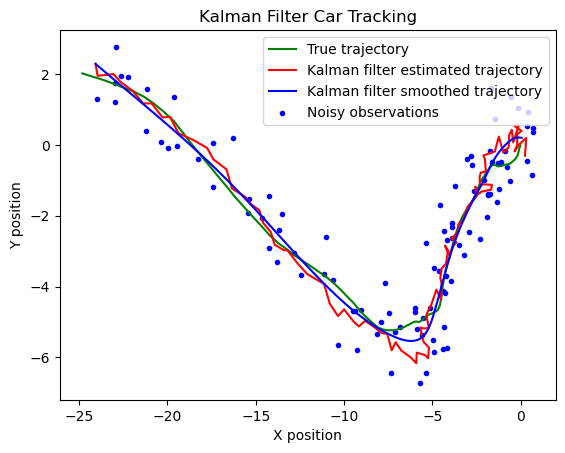

In [13]:
plt.plot(states[:, 0], states[:, 1], 'g-', label='True trajectory')
plt.plot(state_estimates[:, 0], state_estimates[:, 1], 'r-', label='Kalman filter estimated trajectory')
plt.plot(state_estimates_smoothed[:, 0], state_estimates_smoothed[:, 1], 'b-', label='Kalman filter smoothed trajectory')
plt.scatter(measurements[:, 0], measurements[:, 1], c='b', marker='.', label='Noisy observations')
plt.xlabel('X position')
plt.ylabel('Y position')
plt.legend()
plt.title('Kalman Filter Car Tracking')
plt.show()